In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import timeit


# Load the dataset
df = pd.read_csv('/content/Class_Sonar.csv')

In [99]:
df.head()

,Ang1,Ang2,Ang3,Ang4,Ang5,Ang6,Ang7,Ang8,Ang9,Ang10,...,Ang52,Ang53,Ang54,Ang55,Ang56,Ang57,Ang58,Ang59,Ang60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ang1    208 non-null    float64
 1   Ang2    208 non-null    float64
 2   Ang3    208 non-null    float64
 3   Ang4    208 non-null    float64
 4   Ang5    208 non-null    float64
 5   Ang6    208 non-null    float64
 6   Ang7    208 non-null    float64
 7   Ang8    208 non-null    float64
 8   Ang9    208 non-null    float64
 9   Ang10   208 non-null    float64
 10  Ang11   208 non-null    float64
 11  Ang12   208 non-null    float64
 12  Ang13   208 non-null    float64
 13  Ang14   208 non-null    float64
 14  Ang15   208 non-null    float64
 15  Ang16   208 non-null    float64
 16  Ang17   208 non-null    float64
 17  Ang18   208 non-null    float64
 18  Ang19   208 non-null    float64
 19  Ang20   208 non-null    float64
 20  Ang21   208 non-null    float64
 21  Ang22   208 non-null    float64
 22  An

In [101]:
df.isnull().sum()

Ang1     0
Ang2     0
Ang3     0
Ang4     0
Ang5     0
        ..
Ang57    0
Ang58    0
Ang59    0
Ang60    0
Class    0
Length: 61, dtype: int64

In [102]:
df.describe()

,Ang1,Ang2,Ang3,Ang4,Ang5,Ang6,Ang7,Ang8,Ang9,Ang10,...,Ang51,Ang52,Ang53,Ang54,Ang55,Ang56,Ang57,Ang58,Ang59,Ang60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [103]:
df.Class.value_counts()

M    111
R     97
Name: Class, dtype: int64

In [104]:
# Split the dataset into train and test sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train_scaled, X_test_scaled)

array([[0.74188791, 0.50340557, 0.28028383, ..., 0.66352201, 0.62258953,
        0.23094688],
       [0.43067847, 0.28297214, 0.24024328, ..., 0.3490566 , 0.30578512,
        0.21709007],
       [0.13716814, 0.09164087, 0.16218956, ..., 0.32075472, 0.2231405 ,
        0.06928406],
       ...,
       [0.18067847, 0.10835913, 0.11657375, ..., 0.01572327, 0.1184573 ,
        0.16397229],
       [0.27949853, 0.2495356 , 0.21388748, ..., 0.20440252, 0.14325069,
        0.18706697],
       [0.42182891, 0.73869969, 0.63051191, ..., 0.3081761 , 0.62534435,
        0.27251732]])

In [107]:
# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multi-layer Perceptron": MLPClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import timeit #time complexity
acc = {}
prec = {}
recall = {}
time = {}

In [109]:
def train(model):


    model.fit(X_train_scaled, y_train)
    return model

def test(model):
    y_pred = model.predict(X_test_scaled)
    acc[clf_name] = accuracy_score(y_test, y_pred)
    prec[clf_name] = precision_score(y_test, y_pred, average='binary', pos_label='M')
    recall[clf_name] = recall_score(y_test, y_pred, average='binary', pos_label='M')


## Logistic Regression

1. Type: Binary Classification
2. Outlier Sensitivity: Sensitive to outliers
3. Scaling: Scaling not necessary but can help with gradient descent based optimization, regularization
4. Encoding: Encoding is MUST (LR works with numerical inputs)
5. Ensemble: Used as base classifier often
6. Output: Predicted probability of belongingness to a class

In [110]:
clf = LogisticRegression()
clf_name = 'Logistic_regression'

trained_model = train(clf)
test(trained_model)

time_taken = timeit.timeit(stmt='train(clf)', globals=globals(), number=1)
time[clf_name] = time_taken

## Decision Trees

1. Type: Supports both binary and multi-class classification inherently.
2. Outlier: Sensitive to outliers (it can create overfitting by adapting to noise)
3. Scaling: Doesn’t require feature scaling as it's based on decision rules
4. Encoding: Can handle categorical features directly without encoding
5. Ensemble: Can be part of an ensemble like Random Forest or AdaBoost
6. Output: Produces class labels or probabilities for each class

In [111]:
clf = DecisionTreeClassifier()
clf_name = 'Decision_Tree'

trained_model = train(clf)
test(trained_model)

time_taken = timeit.timeit(stmt='train(clf)', globals=globals(), number=1)
time[clf_name] = time_taken

## Multi-Layer Perceptron


1. Type: Supports binary & multi-class classification (using one-vs-all strategy)
2. Outlier: Sensitive to outliers (can significantly influence weight updates during training)
3. Scaling: Benefits from feature scaling to expedite convergence
4. Encoding: Requires categorical features to be one-hot/label encoded for processing
5. Ensemble: Can be part of ensemble (not common used due to complexity)
6. Output:  Provides class probabilities for each class

In [112]:
clf = MLPClassifier()
clf_name = 'MLP'

trained_model = train(clf)
test(trained_model)

time_taken = timeit.timeit(stmt='train(clf)', globals=globals(), number=1)
time[clf_name] = time_taken

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Support Vector Machines


1. Type: Binary & multi-class (one-vs-one or one-vs-all)
2. Outlier: Can be sensitive to outliers (especially in scenarios where the margins need to be maximized)
3. Scaling: Requires feature scaling (especially for kernels like RBF)
4. Encoding: Requires categorical features to be encoded (one-hot/label encoded)
5. Ensemble: Can be used in ensembles like Bagging or Boosting methods
6. Output: Provides class labels based on the decision boundary

In [113]:
clf = SVC()
clf_name = 'SVM'

trained_model = train(clf)
test(trained_model)

time_taken = timeit.timeit(stmt='train(clf)', globals=globals(), number=1)
time[clf_name] = time_taken

## Random Forest


1. Type: Supports both binary and multi-class classification inherently.
2. Outlier: Less sensitive to outliers (due to the aggregation of multiple trees)
3. Scaling: Not sensitive to feature scaling due to its ensemble nature
4. Encoding: Can handle categorical features directly without encoding
5. Ensemble: ensemble method itself (composed of multiple decision trees)
6. Output: Provides class labels or probabilities for each class based on the ensemble's decision

In [114]:
clf = RandomForestClassifier()
clf_name = 'RandomForest'

trained_model = train(clf)
test(trained_model)

time_taken = timeit.timeit(stmt='train(clf)', globals=globals(), number=1)
time[clf_name] = time_taken

## AdaBoost


1. Type: Primary design for binary classification (can be extended to multi-class problems using strategies like one-vs-all)

2. Outlier: Can be sensitive to outliers (they might be assigned higher weights during subsequent boosting iterations)

3. Scaling: Not required (but might help improve convergence)
4. Encoding: Requires categorical features to be encoded
5. Ensemble: Boosting ensemble method itself
6. Output: Offers class labels based on boosted weak learners

In [115]:
clf = AdaBoostClassifier()
clf_name = 'AdaBoost'

trained_model = train(clf)
test(trained_model)

time_taken = timeit.timeit(stmt='train(clf)', globals=globals(), number=1)
time[clf_name] = time_taken

## Comparing Metrics

In [119]:
combined_table = {}

for algorithm in acc:
    combined_table[algorithm] = {
        'Accuracy': acc[algorithm],
        'Precision': prec.get(algorithm, None),
        'Recall': recall.get(algorithm, None),
        'Time_Complexity': time.get(algorithm, None)
    }

print(combined_table)

{'Logistic_regression': {'Accuracy': 0.8095238095238095, 'Precision': 0.8108108108108109, 'Recall': 0.8571428571428571, 'Time_Complexity': 0.019923128000300494}, 'Decision_Tree': {'Accuracy': 0.746031746031746, 'Precision': 0.8518518518518519, 'Recall': 0.6571428571428571, 'Time_Complexity': 0.011308006000035675}, 'MLP': {'Accuracy': 0.8412698412698413, 'Precision': 0.8378378378378378, 'Recall': 0.8857142857142857, 'Time_Complexity': 0.47837470800004667}, 'SVM': {'Accuracy': 0.8253968253968254, 'Precision': 0.8157894736842105, 'Recall': 0.8857142857142857, 'Time_Complexity': 0.005984501999591885}, 'RandomForest': {'Accuracy': 0.873015873015873, 'Precision': 0.8857142857142857, 'Recall': 0.8857142857142857, 'Time_Complexity': 0.1854286139996475}, 'AdaBoost': {'Accuracy': 0.8253968253968254, 'Precision': 0.8, 'Recall': 0.9142857142857143, 'Time_Complexity': 0.14087633100007224}}


In [120]:
df = pd.DataFrame.from_dict(combined_table, orient='index')

print(df)

                     Accuracy  Precision    Recall  Time_Complexity
Logistic_regression  0.809524   0.810811  0.857143         0.019923
Decision_Tree        0.746032   0.851852  0.657143         0.011308
MLP                  0.841270   0.837838  0.885714         0.478375
SVM                  0.825397   0.815789  0.885714         0.005985
RandomForest         0.873016   0.885714  0.885714         0.185429
AdaBoost             0.825397   0.800000  0.914286         0.140876


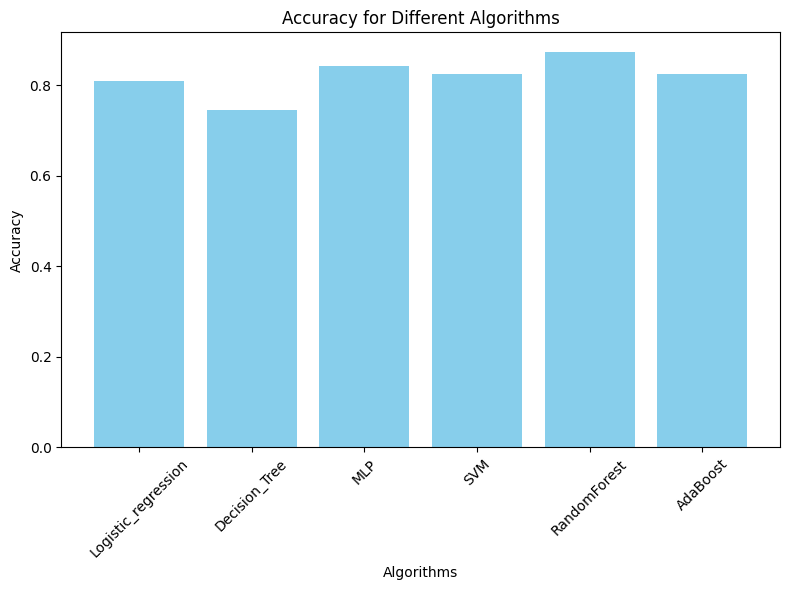

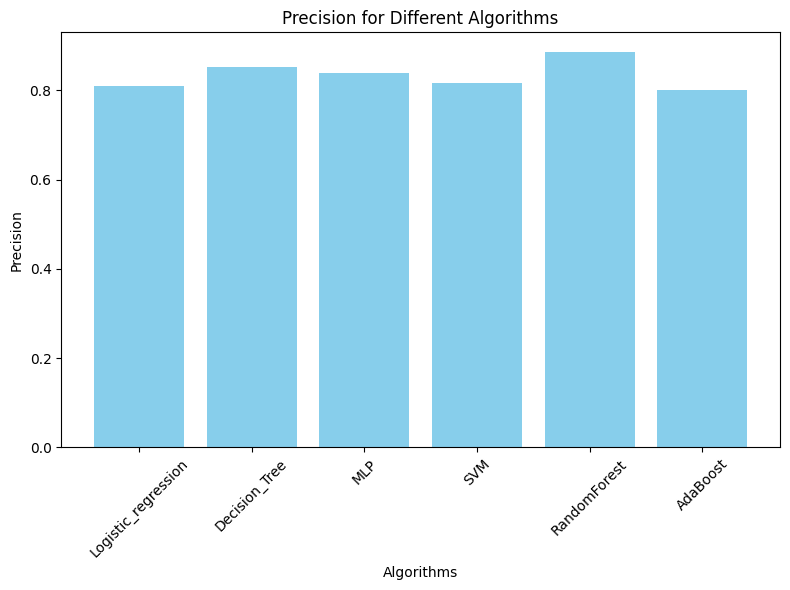

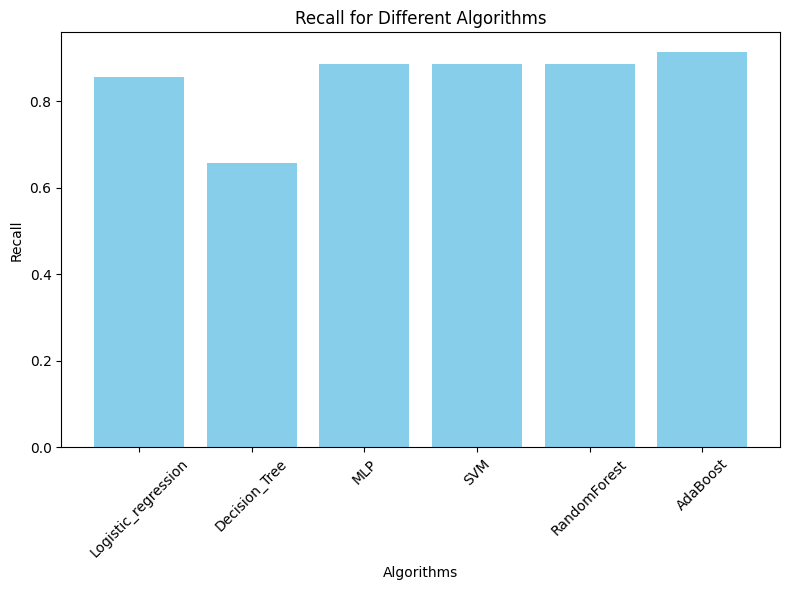

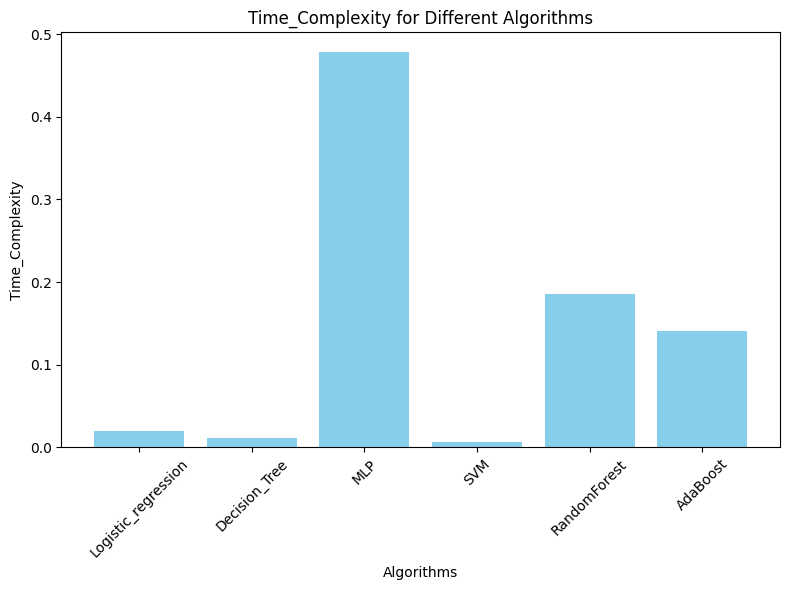

In [121]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'Time_Complexity']

for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(df.index, df[metric], color='skyblue')
    plt.xlabel('Algorithms')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Algorithms')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()